In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("success.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


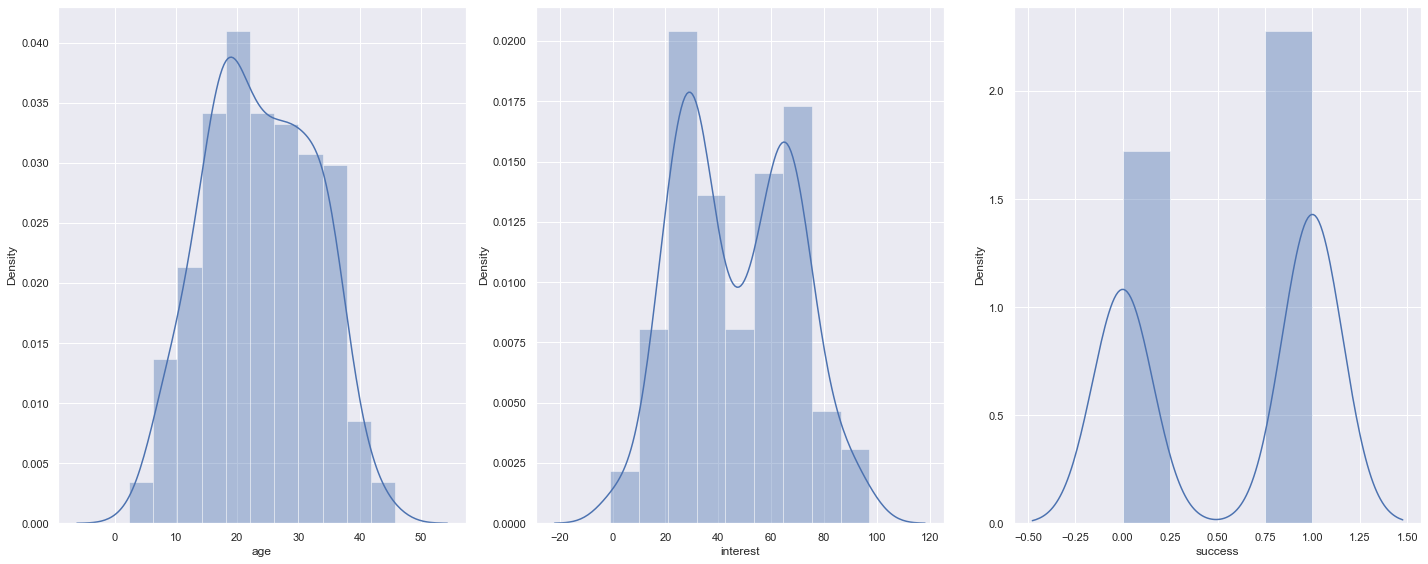

In [13]:
sns.set()
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 8))
index=0
for k , i in df.items():
    sns.distplot(i, ax=axs[index])
    index +=1

plt.tight_layout()



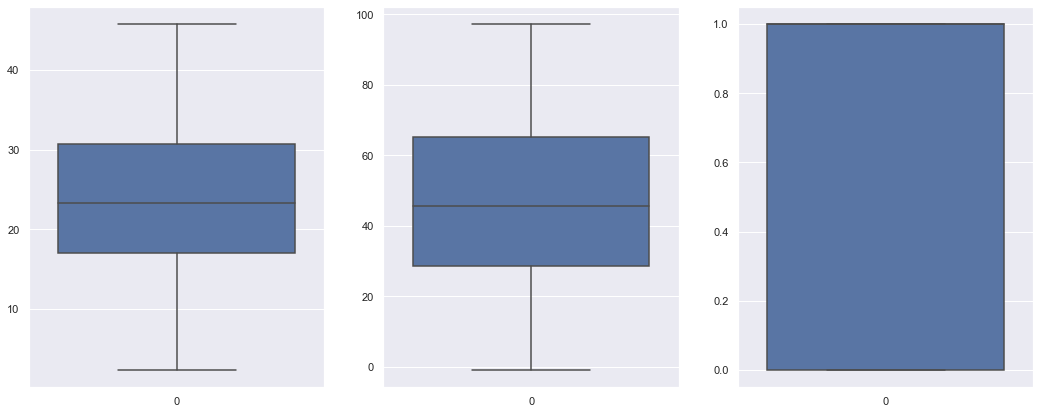

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
for k,i in enumerate(df.columns):
    sns.boxplot(ax=axes[k] , data=df[i])

In [5]:
df["success"]=df["success"].astype("int16")
df.dtypes

age         float64
interest    float64
success       int16
dtype: object

Everythings seems good , Let's Begin!

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

X=df.iloc[:,:2]
Y =df["success"]
X_train , X_test , y_train , y_test = train_test_split(X,Y, train_size=0.8 , random_state=42)
LR = LogisticRegression()
LR.fit(X_train,y_train);


In [7]:
y_predict = LR.predict(X_test)
Cnf_Mat = confusion_matrix(y_test , y_predict)
Report = classification_report(y_test , y_predict);
Cnf_Mat

array([[18,  1],
       [ 4, 37]], dtype=int64)

Let's try normal Data!


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_normal = scaler.fit_transform(X)

In [9]:
X_train_1 , X_test_1 , y_train_1 , y_test_1 = train_test_split(X_normal,Y, train_size=0.8 , random_state= 42)
LR_1 = LogisticRegression()
LR_1.fit(X_train_1,y_train_1);

In [10]:
y_predict_1 = LR_1.predict(X_test_1)
Cnf_Mat_1 = confusion_matrix(y_test_1 , y_predict_1)
Report_1 = classification_report(y_test_1 , y_predict_1)
print(Report,Report_1)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.97      0.90      0.94        41

    accuracy                           0.92        60
   macro avg       0.90      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.97      0.90      0.94        41

    accuracy                           0.92        60
   macro avg       0.90      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



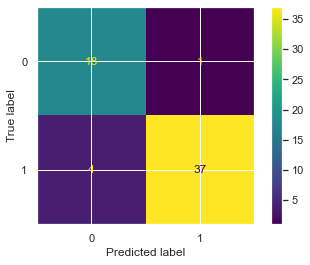

In [11]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR_1 , X_test_1 , y_test_1);

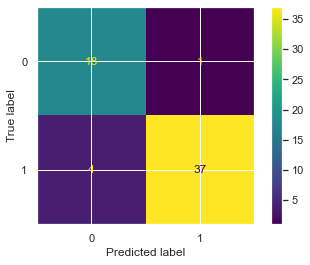

In [12]:
plot_confusion_matrix(LR , X_test , y_test)
plt.show()